In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

sns.set_style('whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [20]:
# reading the dataset
df = pd.read_csv(r'../dataset/forest-cover-type-data.csv')
# standardizating the dataset columns
df.columns = df.columns.str.lower().str.replace(' ','_')
df.sample(5)

,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
2829,2830,2163,19,30,182,-17,721,184,163,101,...,0,0,0,0,0,0,0,0,0,6
2750,2751,2084,22,29,330,26,781,187,164,98,...,0,0,0,0,0,0,0,0,0,6
730,731,2673,27,23,30,11,1113,204,183,106,...,0,0,0,0,0,0,0,0,0,2
1568,1569,3217,313,16,240,74,4696,175,226,191,...,0,0,0,0,0,0,0,0,0,1
3582,3583,2149,59,21,67,21,750,230,192,85,...,0,0,0,0,0,0,0,0,0,6


In [21]:
df.describe()

,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


in most machine learning frameworks, including Tensorflow and Keras, the labels for classification tasks are expected to start from and go up to n-1 (where n is the number of classes). This is known as zero-based indexing.

In [ ]:
# splitting into independent and dependent classes
independent_variable = df.drop(columns='cover_type')
dependent_variable = df['cover_type'] - 1 # adjust labels to be zero-based for model compatibility

In [26]:
# splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, test_size=0.2, random_state=42)

In [30]:
display(x_train.sample(2),x_test.sample(2))

,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
4396,4397,2359,82,14,382,165,924,239,214,103,...,0,0,0,0,0,0,0,0,0,0
10016,10017,3233,355,31,661,121,1276,154,170,142,...,0,0,0,0,0,0,0,0,1,0


,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
2448,2449,2112,15,39,175,101,242,157,133,87,...,0,0,0,0,0,0,0,0,0,0
10192,10193,2897,57,19,306,110,2067,230,197,94,...,0,0,1,0,0,0,0,0,0,0


In [31]:
# standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
display(x_train,x_test)

array([[-0.66027127, -0.93192165, -1.39353286, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.21218549,  0.31796942, -0.8590903 , ..., -0.22401411,
        -0.21279501, -0.17614271],
       [ 0.89370397,  0.53230526,  0.04674455, ..., -0.22401411,
        -0.21279501, -0.17614271],
       ...,
       [-0.49731015,  0.50822258, -0.03478058, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-1.53558564,  0.35409343,  0.88011261, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.06641436,  1.50042898, -0.71415672, ...,  4.46400444,
        -0.21279501, -0.17614271]])

array([[-0.33984983, -0.76815943, -0.08913067, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [ 0.07660637, -0.23593221, -0.38805617, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.16955431,  1.905018  ,  1.43267187, ..., -0.22401411,
        -0.21279501,  5.67721492],
       ...,
       [-1.19476541,  0.07955089, -0.62357323, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [ 1.11419426, -0.98249528,  0.24602822, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.90734875, -1.55807132, -0.02572223, ..., -0.22401411,
        -0.21279501, -0.17614271]])

In [35]:
# defining the model

model = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(14, activation='relu'),
        Dense(7, activation='softmax')  # softmax for multiclass classification (7 classes)
    ]
)

In [ ]:
# compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# train the model
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3755 - loss: 1.6038 - val_accuracy: 0.6289 - val_loss: 0.8658
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6119 - loss: 0.9373 - val_accuracy: 0.6649 - val_loss: 0.8011
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6400 - loss: 0.8569 - val_accuracy: 0.6872 - val_loss: 0.7495
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6646 - loss: 0.7954 - val_accuracy: 0.7021 - val_loss: 0.7219
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6807 - loss: 0.7561 - val_accuracy: 0.7062 - val_loss: 0.6907
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6939 - loss: 0.7314 - val_accuracy: 0.7128 - val_loss: 0.6645
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6966 - loss: 0.7157 - val_accuracy: 0.7194 - val_loss: 0.6598
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7041 - loss: 0.6909 - val_accuracy: 0.

In [ ]:
# evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8142 - loss: 0.5047
Test Accuracy: 0.81
Test Loss: 0.50


In [39]:
# prediction
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       421
           1       0.75      0.53      0.63       438
           2       0.76      0.74      0.75       428
           3       0.87      0.98      0.92       449
           4       0.83      0.93      0.88       416
           5       0.78      0.77      0.77       432
           6       0.90      0.98      0.94       440

    accuracy                           0.81      3024
   macro avg       0.80      0.81      0.80      3024
weighted avg       0.80      0.81      0.80      3024



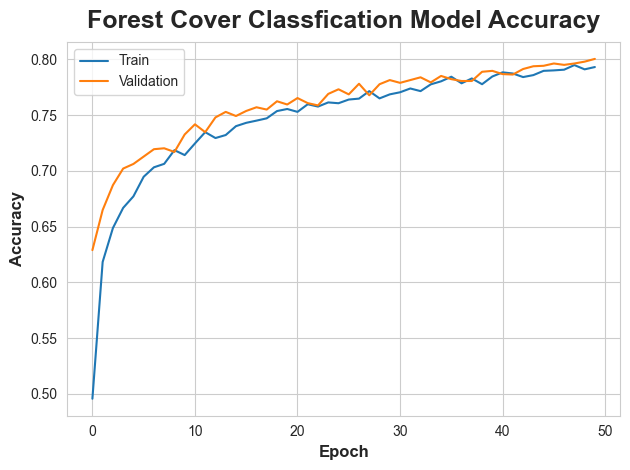

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Forest Cover Classfication Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()

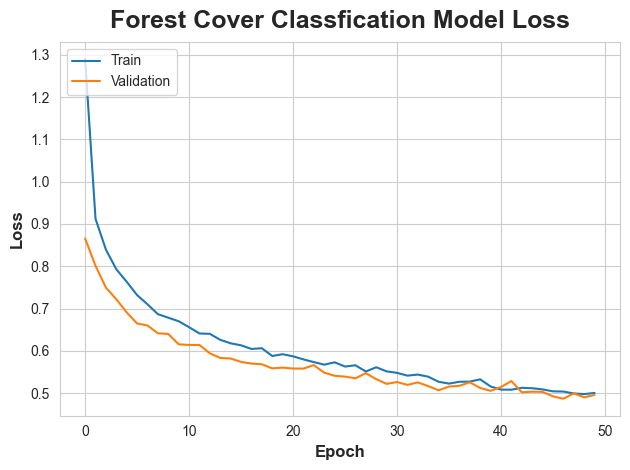

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Forest Cover Classfication Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()